# Data Science Technologies and Systems

# Assignment 1

##### Marneni Shourya Teja                                             

##### U3225636

In this process we are finding insights on few features of restaurants available in sydney and then predicting the success of the restaurants usig regression techniques like multiple linear regression and classification models liek logistic regression, Support Vector Machine, Random Forest etc

In [395]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gds
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import geopandas as gpd
import pandas as pd

In [396]:
# loading and reading data file
zmt_data=pd.read_csv('zomato_df_final_data.csv')

In [397]:
zmt_data.head(2)

address  cost  \
0                   371A Pitt Street, CBD, Sydney  50.0   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   

                type   votes  groupon    color    cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
1           ['Café']  3236.0    False  #9c3203  7.560976       #6f706b

# Part A

As part of Part A we will find out few information on the data availabel like top 3 suburbs, number of unique cuisines, few comparision on restaurants with hight rating and poor rating based on their cost of food, And Exploratory data Analysis of few features like cost, type and rating

## Question1

#### 1.1 How many number of cuisines are served in Sydney?

In [398]:
zmt_data.loc[zmt_data['address'].str.contains('Sydney'),'location']='Sydney'

In [399]:
zmt_data.loc[zmt_data['location'].isna(),'location']='Not Sydney'

In [400]:
zmt_data["cuisine"] = zmt_data["cuisine"].apply(eval)

In [401]:
uniq_cuisine=zmt_data[zmt_data['location']=='Sydney'].cuisine.explode()

In [402]:
print("Number of Unique cusines served by the sydney restuarant are", uniq_cuisine.nunique())

Number of Unique cusines served by the sydney restuarant are 134


#### 1.2 Which suburbs have the highest number of restaurants?

In [403]:
Top_3_sub = zmt_data.groupby(['subzone']).agg(No_of_restuarants=('title','count')).reset_index().sort_values(by=['No_of_restuarants'],ascending=False).head(3)
Top_3_sub

subzone  No_of_restuarants
61           CBD                476
467  Surry Hills                260
371   Parramatta                225

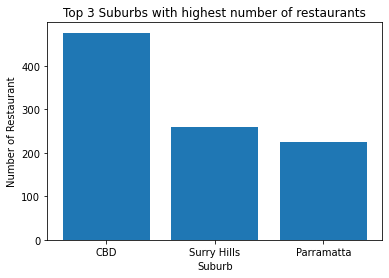

In [404]:
plt.bar(Top_3_sub['subzone'], Top_3_sub['No_of_restuarants'])
plt.title('Top 3 Suburbs with highest number of restaurants')
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurant')
plt.show()

Top three suburbs with highest number of restaurants are CBD, Suurry Hills and Parramatta

#### 1.4 Do you agree with the statement? "Restaurants with high rating are mostly expensive while those with poor rating are rarely expensive"

In [405]:
rating_count=zmt_data.groupby(['rating_text']).agg(avg_cost=('cost','mean')).sort_values(by=['avg_cost'],ascending=False).reset_index()

plt.bar(rating_count['rating_text'], rating_count['avg_cost'])
plt.title('Rating vs Cost')
plt.xlabel('rating')
plt.ylabel('Average Cost')
plt.show()

By looking at the above histogram we can say there are few deflection in between average and poor rating restaurants prices

I dont agree with the statement restaurants with excellent rating are expensive compared to restaurants with poor rating

## Question 2

#### As part of question Exploratory data analysis is performed in between cost, rating and type features

Text(0.5, 1.0, 'Title vs Number of Restaurant')

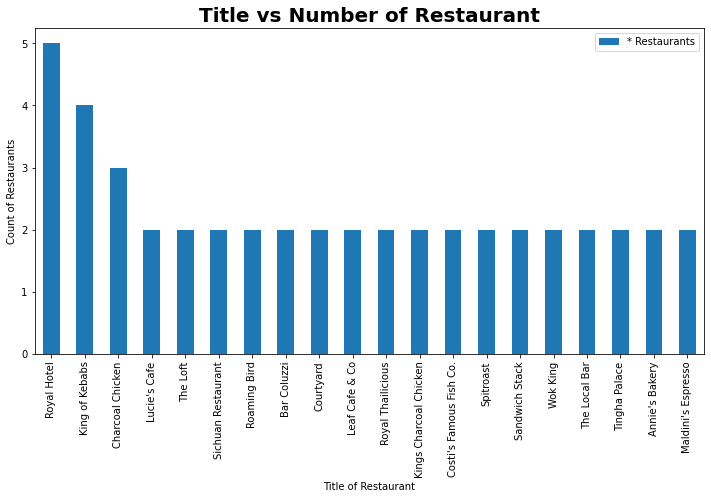

In [406]:
plt.figure(figsize = (12,6))
ax = zmt_data.title.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Title of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Title vs Number of Restaurant",fontsize =20, weight = 'bold')

Text(0.5, 1.0, 'subzone vs Count')

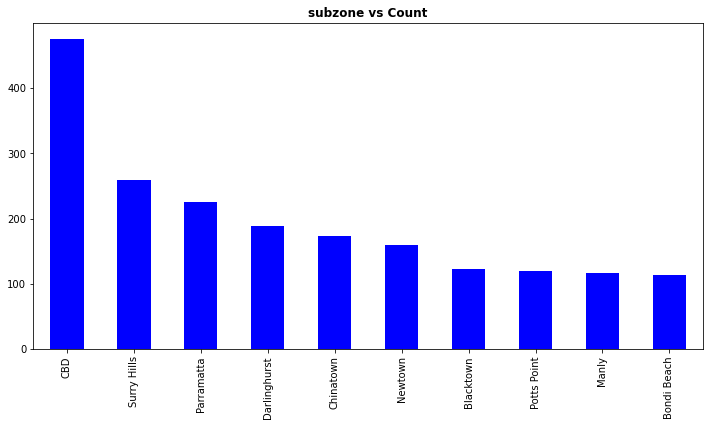

In [407]:
plt.figure(figsize = (12,6))
zmt_data['subzone'].value_counts()[:10].plot(kind = 'bar', color = 'b')
plt.title("subzone vs Count", weight = 'bold')

In [408]:
zmt_data['type'].fillna(zmt_data['type'].mode(),inplace=True)

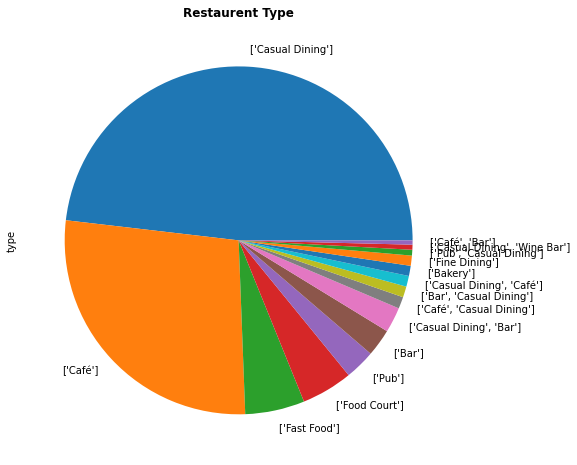

In [374]:
plt.figure(figsize = (14,8))
zmt_data.type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

From above we can see most of the restaurants are of casual dining type followed by cafe

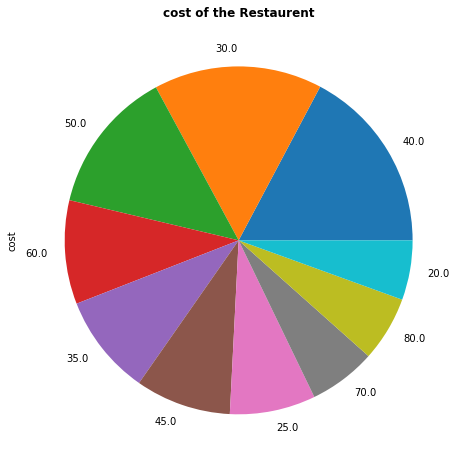

In [375]:
plt.figure(figsize = (12,8))
zmt_data['cost'].value_counts()[:20].plot(kind = 'pie')
plt.title('cost of the Restaurent', weight = 'bold')
plt.show()

From the above pie chart we can notice most of the restaurants have an average cost of 30.0 to 40.0

## Question 3

### Cuisine Density Map

In [376]:
# import the library
import geopandas as gpd
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [377]:
syd_jason = gpd.read_file(r'C:\Users\user\Downloads\data\sydney.geojson')
syd_jason.rename(columns = {'SSC_NAME':'suburb'}, inplace = True)
# check the GeoDataframe
syd_jason.head()

SSC_CODE            suburb CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   
3    10016             Airds  Very good  2.380773   
4    10022        Alexandria  Very good  3.503330   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...  
3  POLYGON ((150.84000 -34.07817, 150.84077 -34.0...  
4  POLYGON ((151.18603 -33.91660, 151.18562 -33.9...

In [378]:
print(list(syd_jason['suburb']))

['Abbotsbury', 'Abbotsford (NSW)', 'Acacia Gardens', 'Airds', 'Alexandria', 'Alfords Point', 'Allambie Heights', 'Allawah', 'Annandale (NSW)', 'Arncliffe', 'Arndell Park', 'Artarmon', 'Ashbury', 'Ashcroft', 'Ashfield (NSW)', 'Auburn (NSW)', 'Balgowlah', 'Balgowlah Heights', 'Balmain', 'Balmain East', 'Bangor (NSW)', 'Banksia', 'Banksmeadow', 'Bankstown', 'Bankstown Aerodrome', 'Barangaroo', 'Barden Ridge', 'Bardwell Park', 'Bardwell Valley', 'Bass Hill', 'Baulkham Hills', 'Beacon Hill', 'Beaconsfield (NSW)', 'Beecroft', 'Belfield', 'Bella Vista', 'Bellevue Hill', 'Belmore', 'Belrose', 'Berala', 'Beverley Park', 'Beverly Hills', 'Bexley', 'Bexley North', 'Birchgrove', 'Birrong', 'Blacktown', 'Blakehurst', 'Bondi', 'Bondi Beach', 'Bondi Junction', 'Bonnet Bay', 'Bonnyrigg', 'Bonnyrigg Heights', 'Bossley Park', 'Botany', 'Botany Bay', 'Bow Bowing', 'Breakfast Point', 'Brighton-le-Sands', 'Bronte', 'Brookvale', 'Bundeena', 'Burraneer', 'Burwood (NSW)', 'Burwood Heights', 'Busby', 'Cabarita

ImportError: The descartes package is required for plotting polygons in geopandas.

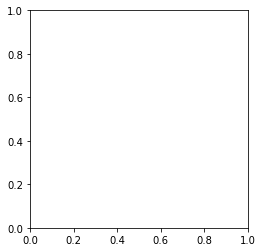

In [379]:
syd_jason.plot(edgecolor="red", alpha=0.6, color="white")

In [ ]:
syd_jason.boundary.plot(figsize=(14,8), color="red")

In [ ]:
syd_ge = syd_jason
syd_ge

In [ ]:
syd_ge.crs

In [ ]:
zmt_data.plot(kind="scatter", x="lng", y="lat")

In [ ]:
from geopandas import points_from_xy

zmt_data2 = pd.read_csv(path+'/zomato_df_final_data.csv')

# turn food_order_df into geodataframe
food_ds = gpd.GeoDataFrame(
    zmt_data2,
    crs="EPSG:4326",
    geometry=points_from_xy(zmt_data["lng"],zmt_data["lat"]),
)

In [ ]:
food_ds.head(3)

In [ ]:
food_ds['cuisine'][0]

In [ ]:
cuisine_df = food_ds[food_ds['cuisine'].str.contains('Korean')]

In [ ]:
joined = gpd.sjoin(
    cuisine_df, 
    syd_ge, 
    how='left',
    op="within",
)

In [ ]:
joined.head()

# Part B

As part of part B we will be cleaning data by doing feature engineering, then one hot encoding for better prediction followed by building regression and classification models.

## Question 1

### Feature Engineering

Feature engineering is performed where NA's are removed or imputed based on their count and unrelated features are removed from the dataset. The output of the feature engineering is a cleaned dataset with no NA's and only with feature which are related to predicted features

In [409]:

zmt_data.fillna(zmt_data.mean(),inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_14536/1613960509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zmt_data.fillna(zmt_data.mean(),inplace=True)


In [410]:
# checking the number of NA's in each feature
zmt_data.isna().sum()

address             0
cost                0
cuisine             0
lat                 0
link                0
lng                 0
phone               0
rating_number       0
rating_text      3316
subzone             0
title               0
type               48
votes               0
groupon             0
color               0
cost_2              0
cuisine_color       0
location            0
dtype: int64

In [411]:
# Imputing the NA's
zmt_data['rating_text'].fillna('Average',inplace=True)

In [412]:
# Imputing the NA's

zmt_data['type'].mode()

0    ['Casual Dining']
dtype: object

In [413]:
# Imputing the NA's
zmt_data['type'].fillna(zmt_data['type'].mode(),inplace=True)

In [414]:
zmt_data.columns

Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color', 'location'],
      dtype='object')

In [415]:
zmt_data.dropna(inplace=True)

In [416]:
zmt_data.head(3)

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   

                               cuisine        lat  \
0   [Hot Pot, Korean BBQ, BBQ, Korean] -33.876059   
1  [Cafe, Coffee and Tea, Salad, Poké] -33.910999   
2                           [Japanese] -33.867971   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   

                type   votes  groupon    color     cost_2 cuisine_color  \
0  ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1           ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2    ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   

     location  
0      Sydney  
1      Sydney  
2  Not Sydney

In [417]:
zmt_data['title'].nunique()

10362

In [418]:
zmt_data.shape

(10452, 18)

In [419]:
# all unwanted features
drop_cols=['address','link','phone','title','cost_2','cuisine_color','color','location','lat','lng']

In [420]:
# drop all unwanted features
zmt_data.drop(drop_cols,axis=1,inplace=True)

In [421]:
zmt_data.head(2)

cost                              cuisine  rating_number rating_text  \
0  50.0   [Hot Pot, Korean BBQ, BBQ, Korean]            4.0   Very Good   
1  80.0  [Cafe, Coffee and Tea, Salad, Poké]            4.6   Excellent   

                                 subzone               type   votes  groupon  
0                                    CBD  ['Casual Dining']  1311.0    False  
1  The Grounds of Alexandria, Alexandria           ['Café']  3236.0    False

In [422]:
zmt_data.dtypes

cost             float64
cuisine           object
rating_number    float64
rating_text       object
subzone           object
type              object
votes            float64
groupon             bool
dtype: object

In [423]:
for i, l in enumerate(zmt_data['cuisine']):
    print('list',i,'is',type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

list 324 is <class 'list'>
list 325 is <class 'list'>
list 326 is <class 'list'>
list 327 is <class 'list'>
list 328 is <class 'list'>
list 329 is <class 'list'>
list 330 is <class 'list'>
list 331 is <class 'list'>
list 332 is <class 'list'>
list 333 is <class 'list'>
list 334 is <class 'list'>
list 335 is <class 'list'>
list 336 is <class 'list'>
list 337 is <class 'list'>
list 338 is <class 'list'>
list 339 is <class 'list'>
list 340 is <class 'list'>
list 341 is <class 'list'>
list 342 is <class 'list'>
list 343 is <class 'list'>
list 344 is <class 'list'>
list 345 is <class 'list'>
list 346 is <class 'list'>
list 347 is <class 'list'>
list 348 is <class 'list'>
list 349 is <class 'list'>
list 350 is <class 'list'>
list 351 is <class 'list'>
list 352 is <class 'list'>
list 353 is <class 'list'>
list 354 is <class 'list'>
list 355 is <class 'list'>
list 356 is <class 'list'>
list 357 is <class 'list'>
list 358 is <class 'list'>
list 359 is <class 'list'>
list 360 is <class 'list'>
l

list 723 is <class 'list'>
list 724 is <class 'list'>
list 725 is <class 'list'>
list 726 is <class 'list'>
list 727 is <class 'list'>
list 728 is <class 'list'>
list 729 is <class 'list'>
list 730 is <class 'list'>
list 731 is <class 'list'>
list 732 is <class 'list'>
list 733 is <class 'list'>
list 734 is <class 'list'>
list 735 is <class 'list'>
list 736 is <class 'list'>
list 737 is <class 'list'>
list 738 is <class 'list'>
list 739 is <class 'list'>
list 740 is <class 'list'>
list 741 is <class 'list'>
list 742 is <class 'list'>
list 743 is <class 'list'>
list 744 is <class 'list'>
list 745 is <class 'list'>
list 746 is <class 'list'>
list 747 is <class 'list'>
list 748 is <class 'list'>
list 749 is <class 'list'>
list 750 is <class 'list'>
list 751 is <class 'list'>
list 752 is <class 'list'>
list 753 is <class 'list'>
list 754 is <class 'list'>
list 755 is <class 'list'>
list 756 is <class 'list'>
list 757 is <class 'list'>
list 758 is <class 'list'>
list 759 is <class 'list'>
l

list 1135 is <class 'list'>
list 1136 is <class 'list'>
list 1137 is <class 'list'>
list 1138 is <class 'list'>
list 1139 is <class 'list'>
list 1140 is <class 'list'>
list 1141 is <class 'list'>
list 1142 is <class 'list'>
list 1143 is <class 'list'>
list 1144 is <class 'list'>
list 1145 is <class 'list'>
list 1146 is <class 'list'>
list 1147 is <class 'list'>
list 1148 is <class 'list'>
list 1149 is <class 'list'>
list 1150 is <class 'list'>
list 1151 is <class 'list'>
list 1152 is <class 'list'>
list 1153 is <class 'list'>
list 1154 is <class 'list'>
list 1155 is <class 'list'>
list 1156 is <class 'list'>
list 1157 is <class 'list'>
list 1158 is <class 'list'>
list 1159 is <class 'list'>
list 1160 is <class 'list'>
list 1161 is <class 'list'>
list 1162 is <class 'list'>
list 1163 is <class 'list'>
list 1164 is <class 'list'>
list 1165 is <class 'list'>
list 1166 is <class 'list'>
list 1167 is <class 'list'>
list 1168 is <class 'list'>
list 1169 is <class 'list'>
list 1170 is <class 

list 1522 is <class 'list'>
list 1523 is <class 'list'>
list 1524 is <class 'list'>
list 1525 is <class 'list'>
list 1526 is <class 'list'>
list 1527 is <class 'list'>
list 1528 is <class 'list'>
list 1529 is <class 'list'>
list 1530 is <class 'list'>
list 1531 is <class 'list'>
list 1532 is <class 'list'>
list 1533 is <class 'list'>
list 1534 is <class 'list'>
list 1535 is <class 'list'>
list 1536 is <class 'list'>
list 1537 is <class 'list'>
list 1538 is <class 'list'>
list 1539 is <class 'list'>
list 1540 is <class 'list'>
list 1541 is <class 'list'>
list 1542 is <class 'list'>
list 1543 is <class 'list'>
list 1544 is <class 'list'>
list 1545 is <class 'list'>
list 1546 is <class 'list'>
list 1547 is <class 'list'>
list 1548 is <class 'list'>
list 1549 is <class 'list'>
list 1550 is <class 'list'>
list 1551 is <class 'list'>
list 1552 is <class 'list'>
list 1553 is <class 'list'>
list 1554 is <class 'list'>
list 1555 is <class 'list'>
list 1556 is <class 'list'>
list 1557 is <class 

list 1947 is <class 'list'>
list 1948 is <class 'list'>
list 1949 is <class 'list'>
list 1950 is <class 'list'>
list 1951 is <class 'list'>
list 1952 is <class 'list'>
list 1953 is <class 'list'>
list 1954 is <class 'list'>
list 1955 is <class 'list'>
list 1956 is <class 'list'>
list 1957 is <class 'list'>
list 1958 is <class 'list'>
list 1959 is <class 'list'>
list 1960 is <class 'list'>
list 1961 is <class 'list'>
list 1962 is <class 'list'>
list 1963 is <class 'list'>
list 1964 is <class 'list'>
list 1965 is <class 'list'>
list 1966 is <class 'list'>
list 1967 is <class 'list'>
list 1968 is <class 'list'>
list 1969 is <class 'list'>
list 1970 is <class 'list'>
list 1971 is <class 'list'>
list 1972 is <class 'list'>
list 1973 is <class 'list'>
list 1974 is <class 'list'>
list 1975 is <class 'list'>
list 1976 is <class 'list'>
list 1977 is <class 'list'>
list 1978 is <class 'list'>
list 1979 is <class 'list'>
list 1980 is <class 'list'>
list 1981 is <class 'list'>
list 1982 is <class 

list 2277 is <class 'list'>
list 2278 is <class 'list'>
list 2279 is <class 'list'>
list 2280 is <class 'list'>
list 2281 is <class 'list'>
list 2282 is <class 'list'>
list 2283 is <class 'list'>
list 2284 is <class 'list'>
list 2285 is <class 'list'>
list 2286 is <class 'list'>
list 2287 is <class 'list'>
list 2288 is <class 'list'>
list 2289 is <class 'list'>
list 2290 is <class 'list'>
list 2291 is <class 'list'>
list 2292 is <class 'list'>
list 2293 is <class 'list'>
list 2294 is <class 'list'>
list 2295 is <class 'list'>
list 2296 is <class 'list'>
list 2297 is <class 'list'>
list 2298 is <class 'list'>
list 2299 is <class 'list'>
list 2300 is <class 'list'>
list 2301 is <class 'list'>
list 2302 is <class 'list'>
list 2303 is <class 'list'>
list 2304 is <class 'list'>
list 2305 is <class 'list'>
list 2306 is <class 'list'>
list 2307 is <class 'list'>
list 2308 is <class 'list'>
list 2309 is <class 'list'>
list 2310 is <class 'list'>
list 2311 is <class 'list'>
list 2312 is <class 

list 2671 is <class 'list'>
list 2672 is <class 'list'>
list 2673 is <class 'list'>
list 2674 is <class 'list'>
list 2675 is <class 'list'>
list 2676 is <class 'list'>
list 2677 is <class 'list'>
list 2678 is <class 'list'>
list 2679 is <class 'list'>
list 2680 is <class 'list'>
list 2681 is <class 'list'>
list 2682 is <class 'list'>
list 2683 is <class 'list'>
list 2684 is <class 'list'>
list 2685 is <class 'list'>
list 2686 is <class 'list'>
list 2687 is <class 'list'>
list 2688 is <class 'list'>
list 2689 is <class 'list'>
list 2690 is <class 'list'>
list 2691 is <class 'list'>
list 2692 is <class 'list'>
list 2693 is <class 'list'>
list 2694 is <class 'list'>
list 2695 is <class 'list'>
list 2696 is <class 'list'>
list 2697 is <class 'list'>
list 2698 is <class 'list'>
list 2699 is <class 'list'>
list 2700 is <class 'list'>
list 2701 is <class 'list'>
list 2702 is <class 'list'>
list 2703 is <class 'list'>
list 2704 is <class 'list'>
list 2705 is <class 'list'>
list 2706 is <class 

list 3070 is <class 'list'>
list 3071 is <class 'list'>
list 3072 is <class 'list'>
list 3073 is <class 'list'>
list 3074 is <class 'list'>
list 3075 is <class 'list'>
list 3076 is <class 'list'>
list 3077 is <class 'list'>
list 3078 is <class 'list'>
list 3079 is <class 'list'>
list 3080 is <class 'list'>
list 3081 is <class 'list'>
list 3082 is <class 'list'>
list 3083 is <class 'list'>
list 3084 is <class 'list'>
list 3085 is <class 'list'>
list 3086 is <class 'list'>
list 3087 is <class 'list'>
list 3088 is <class 'list'>
list 3089 is <class 'list'>
list 3090 is <class 'list'>
list 3091 is <class 'list'>
list 3092 is <class 'list'>
list 3093 is <class 'list'>
list 3094 is <class 'list'>
list 3095 is <class 'list'>
list 3096 is <class 'list'>
list 3097 is <class 'list'>
list 3098 is <class 'list'>
list 3099 is <class 'list'>
list 3100 is <class 'list'>
list 3101 is <class 'list'>
list 3102 is <class 'list'>
list 3103 is <class 'list'>
list 3104 is <class 'list'>
list 3105 is <class 

list 3467 is <class 'list'>
list 3468 is <class 'list'>
list 3469 is <class 'list'>
list 3470 is <class 'list'>
list 3471 is <class 'list'>
list 3472 is <class 'list'>
list 3473 is <class 'list'>
list 3474 is <class 'list'>
list 3475 is <class 'list'>
list 3476 is <class 'list'>
list 3477 is <class 'list'>
list 3478 is <class 'list'>
list 3479 is <class 'list'>
list 3480 is <class 'list'>
list 3481 is <class 'list'>
list 3482 is <class 'list'>
list 3483 is <class 'list'>
list 3484 is <class 'list'>
list 3485 is <class 'list'>
list 3486 is <class 'list'>
list 3487 is <class 'list'>
list 3488 is <class 'list'>
list 3489 is <class 'list'>
list 3490 is <class 'list'>
list 3491 is <class 'list'>
list 3492 is <class 'list'>
list 3493 is <class 'list'>
list 3494 is <class 'list'>
list 3495 is <class 'list'>
list 3496 is <class 'list'>
list 3497 is <class 'list'>
list 3498 is <class 'list'>
list 3499 is <class 'list'>
list 3500 is <class 'list'>
list 3501 is <class 'list'>
list 3502 is <class 

list 3871 is <class 'list'>
list 3872 is <class 'list'>
list 3873 is <class 'list'>
list 3874 is <class 'list'>
list 3875 is <class 'list'>
list 3876 is <class 'list'>
list 3877 is <class 'list'>
list 3878 is <class 'list'>
list 3879 is <class 'list'>
list 3880 is <class 'list'>
list 3881 is <class 'list'>
list 3882 is <class 'list'>
list 3883 is <class 'list'>
list 3884 is <class 'list'>
list 3885 is <class 'list'>
list 3886 is <class 'list'>
list 3887 is <class 'list'>
list 3888 is <class 'list'>
list 3889 is <class 'list'>
list 3890 is <class 'list'>
list 3891 is <class 'list'>
list 3892 is <class 'list'>
list 3893 is <class 'list'>
list 3894 is <class 'list'>
list 3895 is <class 'list'>
list 3896 is <class 'list'>
list 3897 is <class 'list'>
list 3898 is <class 'list'>
list 3899 is <class 'list'>
list 3900 is <class 'list'>
list 3901 is <class 'list'>
list 3902 is <class 'list'>
list 3903 is <class 'list'>
list 3904 is <class 'list'>
list 3905 is <class 'list'>
list 3906 is <class 

list 4274 is <class 'list'>
list 4275 is <class 'list'>
list 4276 is <class 'list'>
list 4277 is <class 'list'>
list 4278 is <class 'list'>
list 4279 is <class 'list'>
list 4280 is <class 'list'>
list 4281 is <class 'list'>
list 4282 is <class 'list'>
list 4283 is <class 'list'>
list 4284 is <class 'list'>
list 4285 is <class 'list'>
list 4286 is <class 'list'>
list 4287 is <class 'list'>
list 4288 is <class 'list'>
list 4289 is <class 'list'>
list 4290 is <class 'list'>
list 4291 is <class 'list'>
list 4292 is <class 'list'>
list 4293 is <class 'list'>
list 4294 is <class 'list'>
list 4295 is <class 'list'>
list 4296 is <class 'list'>
list 4297 is <class 'list'>
list 4298 is <class 'list'>
list 4299 is <class 'list'>
list 4300 is <class 'list'>
list 4301 is <class 'list'>
list 4302 is <class 'list'>
list 4303 is <class 'list'>
list 4304 is <class 'list'>
list 4305 is <class 'list'>
list 4306 is <class 'list'>
list 4307 is <class 'list'>
list 4308 is <class 'list'>
list 4309 is <class 

list 4675 is <class 'list'>
list 4676 is <class 'list'>
list 4677 is <class 'list'>
list 4678 is <class 'list'>
list 4679 is <class 'list'>
list 4680 is <class 'list'>
list 4681 is <class 'list'>
list 4682 is <class 'list'>
list 4683 is <class 'list'>
list 4684 is <class 'list'>
list 4685 is <class 'list'>
list 4686 is <class 'list'>
list 4687 is <class 'list'>
list 4688 is <class 'list'>
list 4689 is <class 'list'>
list 4690 is <class 'list'>
list 4691 is <class 'list'>
list 4692 is <class 'list'>
list 4693 is <class 'list'>
list 4694 is <class 'list'>
list 4695 is <class 'list'>
list 4696 is <class 'list'>
list 4697 is <class 'list'>
list 4698 is <class 'list'>
list 4699 is <class 'list'>
list 4700 is <class 'list'>
list 4701 is <class 'list'>
list 4702 is <class 'list'>
list 4703 is <class 'list'>
list 4704 is <class 'list'>
list 4705 is <class 'list'>
list 4706 is <class 'list'>
list 4707 is <class 'list'>
list 4708 is <class 'list'>
list 4709 is <class 'list'>
list 4710 is <class 

list 5083 is <class 'list'>
list 5084 is <class 'list'>
list 5085 is <class 'list'>
list 5086 is <class 'list'>
list 5087 is <class 'list'>
list 5088 is <class 'list'>
list 5089 is <class 'list'>
list 5090 is <class 'list'>
list 5091 is <class 'list'>
list 5092 is <class 'list'>
list 5093 is <class 'list'>
list 5094 is <class 'list'>
list 5095 is <class 'list'>
list 5096 is <class 'list'>
list 5097 is <class 'list'>
list 5098 is <class 'list'>
list 5099 is <class 'list'>
list 5100 is <class 'list'>
list 5101 is <class 'list'>
list 5102 is <class 'list'>
list 5103 is <class 'list'>
list 5104 is <class 'list'>
list 5105 is <class 'list'>
list 5106 is <class 'list'>
list 5107 is <class 'list'>
list 5108 is <class 'list'>
list 5109 is <class 'list'>
list 5110 is <class 'list'>
list 5111 is <class 'list'>
list 5112 is <class 'list'>
list 5113 is <class 'list'>
list 5114 is <class 'list'>
list 5115 is <class 'list'>
list 5116 is <class 'list'>
list 5117 is <class 'list'>
list 5118 is <class 

list 5491 is <class 'list'>
list 5492 is <class 'list'>
list 5493 is <class 'list'>
list 5494 is <class 'list'>
list 5495 is <class 'list'>
list 5496 is <class 'list'>
list 5497 is <class 'list'>
list 5498 is <class 'list'>
list 5499 is <class 'list'>
list 5500 is <class 'list'>
list 5501 is <class 'list'>
list 5502 is <class 'list'>
list 5503 is <class 'list'>
list 5504 is <class 'list'>
list 5505 is <class 'list'>
list 5506 is <class 'list'>
list 5507 is <class 'list'>
list 5508 is <class 'list'>
list 5509 is <class 'list'>
list 5510 is <class 'list'>
list 5511 is <class 'list'>
list 5512 is <class 'list'>
list 5513 is <class 'list'>
list 5514 is <class 'list'>
list 5515 is <class 'list'>
list 5516 is <class 'list'>
list 5517 is <class 'list'>
list 5518 is <class 'list'>
list 5519 is <class 'list'>
list 5520 is <class 'list'>
list 5521 is <class 'list'>
list 5522 is <class 'list'>
list 5523 is <class 'list'>
list 5524 is <class 'list'>
list 5525 is <class 'list'>
list 5526 is <class 

list 5900 is <class 'list'>
list 5901 is <class 'list'>
list 5902 is <class 'list'>
list 5903 is <class 'list'>
list 5904 is <class 'list'>
list 5905 is <class 'list'>
list 5906 is <class 'list'>
list 5907 is <class 'list'>
list 5908 is <class 'list'>
list 5909 is <class 'list'>
list 5910 is <class 'list'>
list 5911 is <class 'list'>
list 5912 is <class 'list'>
list 5913 is <class 'list'>
list 5914 is <class 'list'>
list 5915 is <class 'list'>
list 5916 is <class 'list'>
list 5917 is <class 'list'>
list 5918 is <class 'list'>
list 5919 is <class 'list'>
list 5920 is <class 'list'>
list 5921 is <class 'list'>
list 5922 is <class 'list'>
list 5923 is <class 'list'>
list 5924 is <class 'list'>
list 5925 is <class 'list'>
list 5926 is <class 'list'>
list 5927 is <class 'list'>
list 5928 is <class 'list'>
list 5929 is <class 'list'>
list 5930 is <class 'list'>
list 5931 is <class 'list'>
list 5932 is <class 'list'>
list 5933 is <class 'list'>
list 5934 is <class 'list'>
list 5935 is <class 

list 6303 is <class 'list'>
list 6304 is <class 'list'>
list 6305 is <class 'list'>
list 6306 is <class 'list'>
list 6307 is <class 'list'>
list 6308 is <class 'list'>
list 6309 is <class 'list'>
list 6310 is <class 'list'>
list 6311 is <class 'list'>
list 6312 is <class 'list'>
list 6313 is <class 'list'>
list 6314 is <class 'list'>
list 6315 is <class 'list'>
list 6316 is <class 'list'>
list 6317 is <class 'list'>
list 6318 is <class 'list'>
list 6319 is <class 'list'>
list 6320 is <class 'list'>
list 6321 is <class 'list'>
list 6322 is <class 'list'>
list 6323 is <class 'list'>
list 6324 is <class 'list'>
list 6325 is <class 'list'>
list 6326 is <class 'list'>
list 6327 is <class 'list'>
list 6328 is <class 'list'>
list 6329 is <class 'list'>
list 6330 is <class 'list'>
list 6331 is <class 'list'>
list 6332 is <class 'list'>
list 6333 is <class 'list'>
list 6334 is <class 'list'>
list 6335 is <class 'list'>
list 6336 is <class 'list'>
list 6337 is <class 'list'>
list 6338 is <class 

list 6698 is <class 'list'>
list 6699 is <class 'list'>
list 6700 is <class 'list'>
list 6701 is <class 'list'>
list 6702 is <class 'list'>
list 6703 is <class 'list'>
list 6704 is <class 'list'>
list 6705 is <class 'list'>
list 6706 is <class 'list'>
list 6707 is <class 'list'>
list 6708 is <class 'list'>
list 6709 is <class 'list'>
list 6710 is <class 'list'>
list 6711 is <class 'list'>
list 6712 is <class 'list'>
list 6713 is <class 'list'>
list 6714 is <class 'list'>
list 6715 is <class 'list'>
list 6716 is <class 'list'>
list 6717 is <class 'list'>
list 6718 is <class 'list'>
list 6719 is <class 'list'>
list 6720 is <class 'list'>
list 6721 is <class 'list'>
list 6722 is <class 'list'>
list 6723 is <class 'list'>
list 6724 is <class 'list'>
list 6725 is <class 'list'>
list 6726 is <class 'list'>
list 6727 is <class 'list'>
list 6728 is <class 'list'>
list 6729 is <class 'list'>
list 6730 is <class 'list'>
list 6731 is <class 'list'>
list 6732 is <class 'list'>
list 6733 is <class 

list 7106 is <class 'list'>
list 7107 is <class 'list'>
list 7108 is <class 'list'>
list 7109 is <class 'list'>
list 7110 is <class 'list'>
list 7111 is <class 'list'>
list 7112 is <class 'list'>
list 7113 is <class 'list'>
list 7114 is <class 'list'>
list 7115 is <class 'list'>
list 7116 is <class 'list'>
list 7117 is <class 'list'>
list 7118 is <class 'list'>
list 7119 is <class 'list'>
list 7120 is <class 'list'>
list 7121 is <class 'list'>
list 7122 is <class 'list'>
list 7123 is <class 'list'>
list 7124 is <class 'list'>
list 7125 is <class 'list'>
list 7126 is <class 'list'>
list 7127 is <class 'list'>
list 7128 is <class 'list'>
list 7129 is <class 'list'>
list 7130 is <class 'list'>
list 7131 is <class 'list'>
list 7132 is <class 'list'>
list 7133 is <class 'list'>
list 7134 is <class 'list'>
list 7135 is <class 'list'>
list 7136 is <class 'list'>
list 7137 is <class 'list'>
list 7138 is <class 'list'>
list 7139 is <class 'list'>
list 7140 is <class 'list'>
list 7141 is <class 

list 7495 is <class 'list'>
list 7496 is <class 'list'>
list 7497 is <class 'list'>
list 7498 is <class 'list'>
list 7499 is <class 'list'>
list 7500 is <class 'list'>
list 7501 is <class 'list'>
list 7502 is <class 'list'>
list 7503 is <class 'list'>
list 7504 is <class 'list'>
list 7505 is <class 'list'>
list 7506 is <class 'list'>
list 7507 is <class 'list'>
list 7508 is <class 'list'>
list 7509 is <class 'list'>
list 7510 is <class 'list'>
list 7511 is <class 'list'>
list 7512 is <class 'list'>
list 7513 is <class 'list'>
list 7514 is <class 'list'>
list 7515 is <class 'list'>
list 7516 is <class 'list'>
list 7517 is <class 'list'>
list 7518 is <class 'list'>
list 7519 is <class 'list'>
list 7520 is <class 'list'>
list 7521 is <class 'list'>
list 7522 is <class 'list'>
list 7523 is <class 'list'>
list 7524 is <class 'list'>
list 7525 is <class 'list'>
list 7526 is <class 'list'>
list 7527 is <class 'list'>
list 7528 is <class 'list'>
list 7529 is <class 'list'>
list 7530 is <class 

list 7902 is <class 'list'>
list 7903 is <class 'list'>
list 7904 is <class 'list'>
list 7905 is <class 'list'>
list 7906 is <class 'list'>
list 7907 is <class 'list'>
list 7908 is <class 'list'>
list 7909 is <class 'list'>
list 7910 is <class 'list'>
list 7911 is <class 'list'>
list 7912 is <class 'list'>
list 7913 is <class 'list'>
list 7914 is <class 'list'>
list 7915 is <class 'list'>
list 7916 is <class 'list'>
list 7917 is <class 'list'>
list 7918 is <class 'list'>
list 7919 is <class 'list'>
list 7920 is <class 'list'>
list 7921 is <class 'list'>
list 7922 is <class 'list'>
list 7923 is <class 'list'>
list 7924 is <class 'list'>
list 7925 is <class 'list'>
list 7926 is <class 'list'>
list 7927 is <class 'list'>
list 7928 is <class 'list'>
list 7929 is <class 'list'>
list 7930 is <class 'list'>
list 7931 is <class 'list'>
list 7932 is <class 'list'>
list 7933 is <class 'list'>
list 7934 is <class 'list'>
list 7935 is <class 'list'>
list 7936 is <class 'list'>
list 7937 is <class 

list 8302 is <class 'list'>
list 8303 is <class 'list'>
list 8304 is <class 'list'>
list 8305 is <class 'list'>
list 8306 is <class 'list'>
list 8307 is <class 'list'>
list 8308 is <class 'list'>
list 8309 is <class 'list'>
list 8310 is <class 'list'>
list 8311 is <class 'list'>
list 8312 is <class 'list'>
list 8313 is <class 'list'>
list 8314 is <class 'list'>
list 8315 is <class 'list'>
list 8316 is <class 'list'>
list 8317 is <class 'list'>
list 8318 is <class 'list'>
list 8319 is <class 'list'>
list 8320 is <class 'list'>
list 8321 is <class 'list'>
list 8322 is <class 'list'>
list 8323 is <class 'list'>
list 8324 is <class 'list'>
list 8325 is <class 'list'>
list 8326 is <class 'list'>
list 8327 is <class 'list'>
list 8328 is <class 'list'>
list 8329 is <class 'list'>
list 8330 is <class 'list'>
list 8331 is <class 'list'>
list 8332 is <class 'list'>
list 8333 is <class 'list'>
list 8334 is <class 'list'>
list 8335 is <class 'list'>
list 8336 is <class 'list'>
list 8337 is <class 

list 8699 is <class 'list'>
list 8700 is <class 'list'>
list 8701 is <class 'list'>
list 8702 is <class 'list'>
list 8703 is <class 'list'>
list 8704 is <class 'list'>
list 8705 is <class 'list'>
list 8706 is <class 'list'>
list 8707 is <class 'list'>
list 8708 is <class 'list'>
list 8709 is <class 'list'>
list 8710 is <class 'list'>
list 8711 is <class 'list'>
list 8712 is <class 'list'>
list 8713 is <class 'list'>
list 8714 is <class 'list'>
list 8715 is <class 'list'>
list 8716 is <class 'list'>
list 8717 is <class 'list'>
list 8718 is <class 'list'>
list 8719 is <class 'list'>
list 8720 is <class 'list'>
list 8721 is <class 'list'>
list 8722 is <class 'list'>
list 8723 is <class 'list'>
list 8724 is <class 'list'>
list 8725 is <class 'list'>
list 8726 is <class 'list'>
list 8727 is <class 'list'>
list 8728 is <class 'list'>
list 8729 is <class 'list'>
list 8730 is <class 'list'>
list 8731 is <class 'list'>
list 8732 is <class 'list'>
list 8733 is <class 'list'>
list 8734 is <class 

list 9109 is <class 'list'>
list 9110 is <class 'list'>
list 9111 is <class 'list'>
list 9112 is <class 'list'>
list 9113 is <class 'list'>
list 9114 is <class 'list'>
list 9115 is <class 'list'>
list 9116 is <class 'list'>
list 9117 is <class 'list'>
list 9118 is <class 'list'>
list 9119 is <class 'list'>
list 9120 is <class 'list'>
list 9121 is <class 'list'>
list 9122 is <class 'list'>
list 9123 is <class 'list'>
list 9124 is <class 'list'>
list 9125 is <class 'list'>
list 9126 is <class 'list'>
list 9127 is <class 'list'>
list 9128 is <class 'list'>
list 9129 is <class 'list'>
list 9130 is <class 'list'>
list 9131 is <class 'list'>
list 9132 is <class 'list'>
list 9133 is <class 'list'>
list 9134 is <class 'list'>
list 9135 is <class 'list'>
list 9136 is <class 'list'>
list 9137 is <class 'list'>
list 9138 is <class 'list'>
list 9139 is <class 'list'>
list 9140 is <class 'list'>
list 9141 is <class 'list'>
list 9142 is <class 'list'>
list 9143 is <class 'list'>
list 9144 is <class 

list 9517 is <class 'list'>
list 9518 is <class 'list'>
list 9519 is <class 'list'>
list 9520 is <class 'list'>
list 9521 is <class 'list'>
list 9522 is <class 'list'>
list 9523 is <class 'list'>
list 9524 is <class 'list'>
list 9525 is <class 'list'>
list 9526 is <class 'list'>
list 9527 is <class 'list'>
list 9528 is <class 'list'>
list 9529 is <class 'list'>
list 9530 is <class 'list'>
list 9531 is <class 'list'>
list 9532 is <class 'list'>
list 9533 is <class 'list'>
list 9534 is <class 'list'>
list 9535 is <class 'list'>
list 9536 is <class 'list'>
list 9537 is <class 'list'>
list 9538 is <class 'list'>
list 9539 is <class 'list'>
list 9540 is <class 'list'>
list 9541 is <class 'list'>
list 9542 is <class 'list'>
list 9543 is <class 'list'>
list 9544 is <class 'list'>
list 9545 is <class 'list'>
list 9546 is <class 'list'>
list 9547 is <class 'list'>
list 9548 is <class 'list'>
list 9549 is <class 'list'>
list 9550 is <class 'list'>
list 9551 is <class 'list'>
list 9552 is <class 

list 9932 is <class 'list'>
list 9933 is <class 'list'>
list 9934 is <class 'list'>
list 9935 is <class 'list'>
list 9936 is <class 'list'>
list 9937 is <class 'list'>
list 9938 is <class 'list'>
list 9939 is <class 'list'>
list 9940 is <class 'list'>
list 9941 is <class 'list'>
list 9942 is <class 'list'>
list 9943 is <class 'list'>
list 9944 is <class 'list'>
list 9945 is <class 'list'>
list 9946 is <class 'list'>
list 9947 is <class 'list'>
list 9948 is <class 'list'>
list 9949 is <class 'list'>
list 9950 is <class 'list'>
list 9951 is <class 'list'>
list 9952 is <class 'list'>
list 9953 is <class 'list'>
list 9954 is <class 'list'>
list 9955 is <class 'list'>
list 9956 is <class 'list'>
list 9957 is <class 'list'>
list 9958 is <class 'list'>
list 9959 is <class 'list'>
list 9960 is <class 'list'>
list 9961 is <class 'list'>
list 9962 is <class 'list'>
list 9963 is <class 'list'>
list 9964 is <class 'list'>
list 9965 is <class 'list'>
list 9966 is <class 'list'>
list 9967 is <class 

list 10340 is <class 'list'>
list 10341 is <class 'list'>
list 10342 is <class 'list'>
list 10343 is <class 'list'>
list 10344 is <class 'list'>
list 10345 is <class 'list'>
list 10346 is <class 'list'>
list 10347 is <class 'list'>
list 10348 is <class 'list'>
list 10349 is <class 'list'>
list 10350 is <class 'list'>
list 10351 is <class 'list'>
list 10352 is <class 'list'>
list 10353 is <class 'list'>
list 10354 is <class 'list'>
list 10355 is <class 'list'>
list 10356 is <class 'list'>
list 10357 is <class 'list'>
list 10358 is <class 'list'>
list 10359 is <class 'list'>
list 10360 is <class 'list'>
list 10361 is <class 'list'>
list 10362 is <class 'list'>
list 10363 is <class 'list'>
list 10364 is <class 'list'>
list 10365 is <class 'list'>
list 10366 is <class 'list'>
list 10367 is <class 'list'>
list 10368 is <class 'list'>
list 10369 is <class 'list'>
list 10370 is <class 'list'>
list 10371 is <class 'list'>
list 10372 is <class 'list'>
list 10373 is <class 'list'>
list 10374 is 

In [424]:
for i, l in enumerate(zmt_data['type']):
    print('list',i,'is',type(l))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>
list 11 is <class 'str'>
list 12 is <class 'str'>
list 13 is <class 'str'>
list 14 is <class 'str'>
list 15 is <class 'str'>
list 16 is <class 'str'>
list 17 is <class 'str'>
list 18 is <class 'str'>
list 19 is <class 'str'>
list 20 is <class 'str'>
list 21 is <class 'str'>
list 22 is <class 'str'>
list 23 is <class 'str'>
list 24 is <class 'str'>
list 25 is <class 'str'>
list 26 is <class 'str'>
list 27 is <class 'str'>
list 28 is <class 'str'>
list 29 is <class 'str'>
list 30 is <class 'str'>
list 31 is <class 'str'>
list 32 is <class 'str'>
list 33 is <class 'str'>
list 34 is <class 'str'>
list 35 is <class 'str'>
list 36 is <class 'str'>
list 37 is <class 'str'>
list 38 is <class 'str'>
list 39 is <class 'str'>
list 40 is

list 346 is <class 'str'>
list 347 is <class 'str'>
list 348 is <class 'str'>
list 349 is <class 'str'>
list 350 is <class 'str'>
list 351 is <class 'str'>
list 352 is <class 'str'>
list 353 is <class 'str'>
list 354 is <class 'str'>
list 355 is <class 'str'>
list 356 is <class 'str'>
list 357 is <class 'str'>
list 358 is <class 'str'>
list 359 is <class 'str'>
list 360 is <class 'str'>
list 361 is <class 'str'>
list 362 is <class 'str'>
list 363 is <class 'str'>
list 364 is <class 'str'>
list 365 is <class 'str'>
list 366 is <class 'str'>
list 367 is <class 'str'>
list 368 is <class 'str'>
list 369 is <class 'str'>
list 370 is <class 'str'>
list 371 is <class 'str'>
list 372 is <class 'str'>
list 373 is <class 'str'>
list 374 is <class 'str'>
list 375 is <class 'str'>
list 376 is <class 'str'>
list 377 is <class 'str'>
list 378 is <class 'str'>
list 379 is <class 'str'>
list 380 is <class 'str'>
list 381 is <class 'str'>
list 382 is <class 'str'>
list 383 is <class 'str'>
list 384 is 

list 716 is <class 'str'>
list 717 is <class 'str'>
list 718 is <class 'str'>
list 719 is <class 'str'>
list 720 is <class 'str'>
list 721 is <class 'str'>
list 722 is <class 'str'>
list 723 is <class 'str'>
list 724 is <class 'str'>
list 725 is <class 'str'>
list 726 is <class 'str'>
list 727 is <class 'str'>
list 728 is <class 'str'>
list 729 is <class 'str'>
list 730 is <class 'str'>
list 731 is <class 'str'>
list 732 is <class 'str'>
list 733 is <class 'str'>
list 734 is <class 'str'>
list 735 is <class 'str'>
list 736 is <class 'str'>
list 737 is <class 'str'>
list 738 is <class 'str'>
list 739 is <class 'str'>
list 740 is <class 'str'>
list 741 is <class 'str'>
list 742 is <class 'str'>
list 743 is <class 'str'>
list 744 is <class 'str'>
list 745 is <class 'str'>
list 746 is <class 'str'>
list 747 is <class 'str'>
list 748 is <class 'str'>
list 749 is <class 'str'>
list 750 is <class 'str'>
list 751 is <class 'str'>
list 752 is <class 'str'>
list 753 is <class 'str'>
list 754 is 

list 1115 is <class 'str'>
list 1116 is <class 'str'>
list 1117 is <class 'str'>
list 1118 is <class 'str'>
list 1119 is <class 'str'>
list 1120 is <class 'str'>
list 1121 is <class 'str'>
list 1122 is <class 'str'>
list 1123 is <class 'str'>
list 1124 is <class 'str'>
list 1125 is <class 'str'>
list 1126 is <class 'str'>
list 1127 is <class 'str'>
list 1128 is <class 'str'>
list 1129 is <class 'str'>
list 1130 is <class 'str'>
list 1131 is <class 'str'>
list 1132 is <class 'str'>
list 1133 is <class 'str'>
list 1134 is <class 'str'>
list 1135 is <class 'str'>
list 1136 is <class 'str'>
list 1137 is <class 'str'>
list 1138 is <class 'str'>
list 1139 is <class 'str'>
list 1140 is <class 'str'>
list 1141 is <class 'str'>
list 1142 is <class 'str'>
list 1143 is <class 'str'>
list 1144 is <class 'str'>
list 1145 is <class 'str'>
list 1146 is <class 'str'>
list 1147 is <class 'str'>
list 1148 is <class 'str'>
list 1149 is <class 'str'>
list 1150 is <class 'str'>
list 1151 is <class 'str'>
l

list 1518 is <class 'str'>
list 1519 is <class 'str'>
list 1520 is <class 'str'>
list 1521 is <class 'str'>
list 1522 is <class 'str'>
list 1523 is <class 'str'>
list 1524 is <class 'str'>
list 1525 is <class 'str'>
list 1526 is <class 'str'>
list 1527 is <class 'str'>
list 1528 is <class 'str'>
list 1529 is <class 'str'>
list 1530 is <class 'str'>
list 1531 is <class 'str'>
list 1532 is <class 'str'>
list 1533 is <class 'str'>
list 1534 is <class 'str'>
list 1535 is <class 'str'>
list 1536 is <class 'str'>
list 1537 is <class 'str'>
list 1538 is <class 'str'>
list 1539 is <class 'str'>
list 1540 is <class 'str'>
list 1541 is <class 'str'>
list 1542 is <class 'str'>
list 1543 is <class 'str'>
list 1544 is <class 'str'>
list 1545 is <class 'str'>
list 1546 is <class 'str'>
list 1547 is <class 'str'>
list 1548 is <class 'str'>
list 1549 is <class 'str'>
list 1550 is <class 'str'>
list 1551 is <class 'str'>
list 1552 is <class 'str'>
list 1553 is <class 'str'>
list 1554 is <class 'str'>
l

list 1924 is <class 'str'>
list 1925 is <class 'str'>
list 1926 is <class 'str'>
list 1927 is <class 'str'>
list 1928 is <class 'str'>
list 1929 is <class 'str'>
list 1930 is <class 'str'>
list 1931 is <class 'str'>
list 1932 is <class 'str'>
list 1933 is <class 'str'>
list 1934 is <class 'str'>
list 1935 is <class 'str'>
list 1936 is <class 'str'>
list 1937 is <class 'str'>
list 1938 is <class 'str'>
list 1939 is <class 'str'>
list 1940 is <class 'str'>
list 1941 is <class 'str'>
list 1942 is <class 'str'>
list 1943 is <class 'str'>
list 1944 is <class 'str'>
list 1945 is <class 'str'>
list 1946 is <class 'str'>
list 1947 is <class 'str'>
list 1948 is <class 'str'>
list 1949 is <class 'str'>
list 1950 is <class 'str'>
list 1951 is <class 'str'>
list 1952 is <class 'str'>
list 1953 is <class 'str'>
list 1954 is <class 'str'>
list 1955 is <class 'str'>
list 1956 is <class 'str'>
list 1957 is <class 'str'>
list 1958 is <class 'str'>
list 1959 is <class 'str'>
list 1960 is <class 'str'>
l

list 2291 is <class 'str'>
list 2292 is <class 'str'>
list 2293 is <class 'str'>
list 2294 is <class 'str'>
list 2295 is <class 'str'>
list 2296 is <class 'str'>
list 2297 is <class 'str'>
list 2298 is <class 'str'>
list 2299 is <class 'str'>
list 2300 is <class 'str'>
list 2301 is <class 'str'>
list 2302 is <class 'str'>
list 2303 is <class 'str'>
list 2304 is <class 'str'>
list 2305 is <class 'str'>
list 2306 is <class 'str'>
list 2307 is <class 'str'>
list 2308 is <class 'str'>
list 2309 is <class 'str'>
list 2310 is <class 'str'>
list 2311 is <class 'str'>
list 2312 is <class 'str'>
list 2313 is <class 'str'>
list 2314 is <class 'str'>
list 2315 is <class 'str'>
list 2316 is <class 'str'>
list 2317 is <class 'str'>
list 2318 is <class 'str'>
list 2319 is <class 'str'>
list 2320 is <class 'str'>
list 2321 is <class 'str'>
list 2322 is <class 'str'>
list 2323 is <class 'str'>
list 2324 is <class 'str'>
list 2325 is <class 'str'>
list 2326 is <class 'str'>
list 2327 is <class 'str'>
l

list 2689 is <class 'str'>
list 2690 is <class 'str'>
list 2691 is <class 'str'>
list 2692 is <class 'str'>
list 2693 is <class 'str'>
list 2694 is <class 'str'>
list 2695 is <class 'str'>
list 2696 is <class 'str'>
list 2697 is <class 'str'>
list 2698 is <class 'str'>
list 2699 is <class 'str'>
list 2700 is <class 'str'>
list 2701 is <class 'str'>
list 2702 is <class 'str'>
list 2703 is <class 'str'>
list 2704 is <class 'str'>
list 2705 is <class 'str'>
list 2706 is <class 'str'>
list 2707 is <class 'str'>
list 2708 is <class 'str'>
list 2709 is <class 'str'>
list 2710 is <class 'str'>
list 2711 is <class 'str'>
list 2712 is <class 'str'>
list 2713 is <class 'str'>
list 2714 is <class 'str'>
list 2715 is <class 'str'>
list 2716 is <class 'str'>
list 2717 is <class 'str'>
list 2718 is <class 'str'>
list 2719 is <class 'str'>
list 2720 is <class 'str'>
list 2721 is <class 'str'>
list 2722 is <class 'str'>
list 2723 is <class 'str'>
list 2724 is <class 'str'>
list 2725 is <class 'str'>
l

list 3100 is <class 'str'>
list 3101 is <class 'str'>
list 3102 is <class 'str'>
list 3103 is <class 'str'>
list 3104 is <class 'str'>
list 3105 is <class 'str'>
list 3106 is <class 'str'>
list 3107 is <class 'str'>
list 3108 is <class 'str'>
list 3109 is <class 'str'>
list 3110 is <class 'str'>
list 3111 is <class 'str'>
list 3112 is <class 'str'>
list 3113 is <class 'str'>
list 3114 is <class 'str'>
list 3115 is <class 'str'>
list 3116 is <class 'str'>
list 3117 is <class 'str'>
list 3118 is <class 'str'>
list 3119 is <class 'str'>
list 3120 is <class 'str'>
list 3121 is <class 'str'>
list 3122 is <class 'str'>
list 3123 is <class 'str'>
list 3124 is <class 'str'>
list 3125 is <class 'str'>
list 3126 is <class 'str'>
list 3127 is <class 'str'>
list 3128 is <class 'str'>
list 3129 is <class 'str'>
list 3130 is <class 'str'>
list 3131 is <class 'str'>
list 3132 is <class 'str'>
list 3133 is <class 'str'>
list 3134 is <class 'str'>
list 3135 is <class 'str'>
list 3136 is <class 'str'>
l

list 3493 is <class 'str'>
list 3494 is <class 'str'>
list 3495 is <class 'str'>
list 3496 is <class 'str'>
list 3497 is <class 'str'>
list 3498 is <class 'str'>
list 3499 is <class 'str'>
list 3500 is <class 'str'>
list 3501 is <class 'str'>
list 3502 is <class 'str'>
list 3503 is <class 'str'>
list 3504 is <class 'str'>
list 3505 is <class 'str'>
list 3506 is <class 'str'>
list 3507 is <class 'str'>
list 3508 is <class 'str'>
list 3509 is <class 'str'>
list 3510 is <class 'str'>
list 3511 is <class 'str'>
list 3512 is <class 'str'>
list 3513 is <class 'str'>
list 3514 is <class 'str'>
list 3515 is <class 'str'>
list 3516 is <class 'str'>
list 3517 is <class 'str'>
list 3518 is <class 'str'>
list 3519 is <class 'str'>
list 3520 is <class 'str'>
list 3521 is <class 'str'>
list 3522 is <class 'str'>
list 3523 is <class 'str'>
list 3524 is <class 'str'>
list 3525 is <class 'str'>
list 3526 is <class 'str'>
list 3527 is <class 'str'>
list 3528 is <class 'str'>
list 3529 is <class 'str'>
l

list 3899 is <class 'str'>
list 3900 is <class 'str'>
list 3901 is <class 'str'>
list 3902 is <class 'str'>
list 3903 is <class 'str'>
list 3904 is <class 'str'>
list 3905 is <class 'str'>
list 3906 is <class 'str'>
list 3907 is <class 'str'>
list 3908 is <class 'str'>
list 3909 is <class 'str'>
list 3910 is <class 'str'>
list 3911 is <class 'str'>
list 3912 is <class 'str'>
list 3913 is <class 'str'>
list 3914 is <class 'str'>
list 3915 is <class 'str'>
list 3916 is <class 'str'>
list 3917 is <class 'str'>
list 3918 is <class 'str'>
list 3919 is <class 'str'>
list 3920 is <class 'str'>
list 3921 is <class 'str'>
list 3922 is <class 'str'>
list 3923 is <class 'str'>
list 3924 is <class 'str'>
list 3925 is <class 'str'>
list 3926 is <class 'str'>
list 3927 is <class 'str'>
list 3928 is <class 'str'>
list 3929 is <class 'str'>
list 3930 is <class 'str'>
list 3931 is <class 'str'>
list 3932 is <class 'str'>
list 3933 is <class 'str'>
list 3934 is <class 'str'>
list 3935 is <class 'str'>
l

list 4289 is <class 'str'>
list 4290 is <class 'str'>
list 4291 is <class 'str'>
list 4292 is <class 'str'>
list 4293 is <class 'str'>
list 4294 is <class 'str'>
list 4295 is <class 'str'>
list 4296 is <class 'str'>
list 4297 is <class 'str'>
list 4298 is <class 'str'>
list 4299 is <class 'str'>
list 4300 is <class 'str'>
list 4301 is <class 'str'>
list 4302 is <class 'str'>
list 4303 is <class 'str'>
list 4304 is <class 'str'>
list 4305 is <class 'str'>
list 4306 is <class 'str'>
list 4307 is <class 'str'>
list 4308 is <class 'str'>
list 4309 is <class 'str'>
list 4310 is <class 'str'>
list 4311 is <class 'str'>
list 4312 is <class 'str'>
list 4313 is <class 'str'>
list 4314 is <class 'str'>
list 4315 is <class 'str'>
list 4316 is <class 'str'>
list 4317 is <class 'str'>
list 4318 is <class 'str'>
list 4319 is <class 'str'>
list 4320 is <class 'str'>
list 4321 is <class 'str'>
list 4322 is <class 'str'>
list 4323 is <class 'str'>
list 4324 is <class 'str'>
list 4325 is <class 'str'>
l

list 4704 is <class 'str'>
list 4705 is <class 'str'>
list 4706 is <class 'str'>
list 4707 is <class 'str'>
list 4708 is <class 'str'>
list 4709 is <class 'str'>
list 4710 is <class 'str'>
list 4711 is <class 'str'>
list 4712 is <class 'str'>
list 4713 is <class 'str'>
list 4714 is <class 'str'>
list 4715 is <class 'str'>
list 4716 is <class 'str'>
list 4717 is <class 'str'>
list 4718 is <class 'str'>
list 4719 is <class 'str'>
list 4720 is <class 'str'>
list 4721 is <class 'str'>
list 4722 is <class 'str'>
list 4723 is <class 'str'>
list 4724 is <class 'str'>
list 4725 is <class 'str'>
list 4726 is <class 'str'>
list 4727 is <class 'str'>
list 4728 is <class 'str'>
list 4729 is <class 'str'>
list 4730 is <class 'str'>
list 4731 is <class 'str'>
list 4732 is <class 'str'>
list 4733 is <class 'str'>
list 4734 is <class 'str'>
list 4735 is <class 'str'>
list 4736 is <class 'str'>
list 4737 is <class 'str'>
list 4738 is <class 'str'>
list 4739 is <class 'str'>
list 4740 is <class 'str'>
l

list 5079 is <class 'str'>
list 5080 is <class 'str'>
list 5081 is <class 'str'>
list 5082 is <class 'str'>
list 5083 is <class 'str'>
list 5084 is <class 'str'>
list 5085 is <class 'str'>
list 5086 is <class 'str'>
list 5087 is <class 'str'>
list 5088 is <class 'str'>
list 5089 is <class 'str'>
list 5090 is <class 'str'>
list 5091 is <class 'str'>
list 5092 is <class 'str'>
list 5093 is <class 'str'>
list 5094 is <class 'str'>
list 5095 is <class 'str'>
list 5096 is <class 'str'>
list 5097 is <class 'str'>
list 5098 is <class 'str'>
list 5099 is <class 'str'>
list 5100 is <class 'str'>
list 5101 is <class 'str'>
list 5102 is <class 'str'>
list 5103 is <class 'str'>
list 5104 is <class 'str'>
list 5105 is <class 'str'>
list 5106 is <class 'str'>
list 5107 is <class 'str'>
list 5108 is <class 'str'>
list 5109 is <class 'str'>
list 5110 is <class 'str'>
list 5111 is <class 'str'>
list 5112 is <class 'str'>
list 5113 is <class 'str'>
list 5114 is <class 'str'>
list 5115 is <class 'str'>
l

list 5485 is <class 'str'>
list 5486 is <class 'str'>
list 5487 is <class 'str'>
list 5488 is <class 'str'>
list 5489 is <class 'str'>
list 5490 is <class 'str'>
list 5491 is <class 'str'>
list 5492 is <class 'str'>
list 5493 is <class 'str'>
list 5494 is <class 'str'>
list 5495 is <class 'str'>
list 5496 is <class 'str'>
list 5497 is <class 'str'>
list 5498 is <class 'str'>
list 5499 is <class 'str'>
list 5500 is <class 'str'>
list 5501 is <class 'str'>
list 5502 is <class 'str'>
list 5503 is <class 'str'>
list 5504 is <class 'str'>
list 5505 is <class 'str'>
list 5506 is <class 'str'>
list 5507 is <class 'str'>
list 5508 is <class 'str'>
list 5509 is <class 'str'>
list 5510 is <class 'str'>
list 5511 is <class 'str'>
list 5512 is <class 'str'>
list 5513 is <class 'str'>
list 5514 is <class 'str'>
list 5515 is <class 'str'>
list 5516 is <class 'str'>
list 5517 is <class 'str'>
list 5518 is <class 'str'>
list 5519 is <class 'str'>
list 5520 is <class 'str'>
list 5521 is <class 'str'>
l

list 5891 is <class 'str'>
list 5892 is <class 'str'>
list 5893 is <class 'str'>
list 5894 is <class 'str'>
list 5895 is <class 'str'>
list 5896 is <class 'str'>
list 5897 is <class 'str'>
list 5898 is <class 'str'>
list 5899 is <class 'str'>
list 5900 is <class 'str'>
list 5901 is <class 'str'>
list 5902 is <class 'str'>
list 5903 is <class 'str'>
list 5904 is <class 'str'>
list 5905 is <class 'str'>
list 5906 is <class 'str'>
list 5907 is <class 'str'>
list 5908 is <class 'str'>
list 5909 is <class 'str'>
list 5910 is <class 'str'>
list 5911 is <class 'str'>
list 5912 is <class 'str'>
list 5913 is <class 'str'>
list 5914 is <class 'str'>
list 5915 is <class 'str'>
list 5916 is <class 'str'>
list 5917 is <class 'str'>
list 5918 is <class 'str'>
list 5919 is <class 'str'>
list 5920 is <class 'str'>
list 5921 is <class 'str'>
list 5922 is <class 'str'>
list 5923 is <class 'str'>
list 5924 is <class 'str'>
list 5925 is <class 'str'>
list 5926 is <class 'str'>
list 5927 is <class 'str'>
l

list 6291 is <class 'str'>
list 6292 is <class 'str'>
list 6293 is <class 'str'>
list 6294 is <class 'str'>
list 6295 is <class 'str'>
list 6296 is <class 'str'>
list 6297 is <class 'str'>
list 6298 is <class 'str'>
list 6299 is <class 'str'>
list 6300 is <class 'str'>
list 6301 is <class 'str'>
list 6302 is <class 'str'>
list 6303 is <class 'str'>
list 6304 is <class 'str'>
list 6305 is <class 'str'>
list 6306 is <class 'str'>
list 6307 is <class 'str'>
list 6308 is <class 'str'>
list 6309 is <class 'str'>
list 6310 is <class 'str'>
list 6311 is <class 'str'>
list 6312 is <class 'str'>
list 6313 is <class 'str'>
list 6314 is <class 'str'>
list 6315 is <class 'str'>
list 6316 is <class 'str'>
list 6317 is <class 'str'>
list 6318 is <class 'str'>
list 6319 is <class 'str'>
list 6320 is <class 'str'>
list 6321 is <class 'str'>
list 6322 is <class 'str'>
list 6323 is <class 'str'>
list 6324 is <class 'str'>
list 6325 is <class 'str'>
list 6326 is <class 'str'>
list 6327 is <class 'str'>
l

list 6688 is <class 'str'>
list 6689 is <class 'str'>
list 6690 is <class 'str'>
list 6691 is <class 'str'>
list 6692 is <class 'str'>
list 6693 is <class 'str'>
list 6694 is <class 'str'>
list 6695 is <class 'str'>
list 6696 is <class 'str'>
list 6697 is <class 'str'>
list 6698 is <class 'str'>
list 6699 is <class 'str'>
list 6700 is <class 'str'>
list 6701 is <class 'str'>
list 6702 is <class 'str'>
list 6703 is <class 'str'>
list 6704 is <class 'str'>
list 6705 is <class 'str'>
list 6706 is <class 'str'>
list 6707 is <class 'str'>
list 6708 is <class 'str'>
list 6709 is <class 'str'>
list 6710 is <class 'str'>
list 6711 is <class 'str'>
list 6712 is <class 'str'>
list 6713 is <class 'str'>
list 6714 is <class 'str'>
list 6715 is <class 'str'>
list 6716 is <class 'str'>
list 6717 is <class 'str'>
list 6718 is <class 'str'>
list 6719 is <class 'str'>
list 6720 is <class 'str'>
list 6721 is <class 'str'>
list 6722 is <class 'str'>
list 6723 is <class 'str'>
list 6724 is <class 'str'>
l

list 7089 is <class 'str'>
list 7090 is <class 'str'>
list 7091 is <class 'str'>
list 7092 is <class 'str'>
list 7093 is <class 'str'>
list 7094 is <class 'str'>
list 7095 is <class 'str'>
list 7096 is <class 'str'>
list 7097 is <class 'str'>
list 7098 is <class 'str'>
list 7099 is <class 'str'>
list 7100 is <class 'str'>
list 7101 is <class 'str'>
list 7102 is <class 'str'>
list 7103 is <class 'str'>
list 7104 is <class 'str'>
list 7105 is <class 'str'>
list 7106 is <class 'str'>
list 7107 is <class 'str'>
list 7108 is <class 'str'>
list 7109 is <class 'str'>
list 7110 is <class 'str'>
list 7111 is <class 'str'>
list 7112 is <class 'str'>
list 7113 is <class 'str'>
list 7114 is <class 'str'>
list 7115 is <class 'str'>
list 7116 is <class 'str'>
list 7117 is <class 'str'>
list 7118 is <class 'str'>
list 7119 is <class 'str'>
list 7120 is <class 'str'>
list 7121 is <class 'str'>
list 7122 is <class 'str'>
list 7123 is <class 'str'>
list 7124 is <class 'str'>
list 7125 is <class 'str'>
l

list 7494 is <class 'str'>
list 7495 is <class 'str'>
list 7496 is <class 'str'>
list 7497 is <class 'str'>
list 7498 is <class 'str'>
list 7499 is <class 'str'>
list 7500 is <class 'str'>
list 7501 is <class 'str'>
list 7502 is <class 'str'>
list 7503 is <class 'str'>
list 7504 is <class 'str'>
list 7505 is <class 'str'>
list 7506 is <class 'str'>
list 7507 is <class 'str'>
list 7508 is <class 'str'>
list 7509 is <class 'str'>
list 7510 is <class 'str'>
list 7511 is <class 'str'>
list 7512 is <class 'str'>
list 7513 is <class 'str'>
list 7514 is <class 'str'>
list 7515 is <class 'str'>
list 7516 is <class 'str'>
list 7517 is <class 'str'>
list 7518 is <class 'str'>
list 7519 is <class 'str'>
list 7520 is <class 'str'>
list 7521 is <class 'str'>
list 7522 is <class 'str'>
list 7523 is <class 'str'>
list 7524 is <class 'str'>
list 7525 is <class 'str'>
list 7526 is <class 'str'>
list 7527 is <class 'str'>
list 7528 is <class 'str'>
list 7529 is <class 'str'>
list 7530 is <class 'str'>
l

list 7892 is <class 'str'>
list 7893 is <class 'str'>
list 7894 is <class 'str'>
list 7895 is <class 'str'>
list 7896 is <class 'str'>
list 7897 is <class 'str'>
list 7898 is <class 'str'>
list 7899 is <class 'str'>
list 7900 is <class 'str'>
list 7901 is <class 'str'>
list 7902 is <class 'str'>
list 7903 is <class 'str'>
list 7904 is <class 'str'>
list 7905 is <class 'str'>
list 7906 is <class 'str'>
list 7907 is <class 'str'>
list 7908 is <class 'str'>
list 7909 is <class 'str'>
list 7910 is <class 'str'>
list 7911 is <class 'str'>
list 7912 is <class 'str'>
list 7913 is <class 'str'>
list 7914 is <class 'str'>
list 7915 is <class 'str'>
list 7916 is <class 'str'>
list 7917 is <class 'str'>
list 7918 is <class 'str'>
list 7919 is <class 'str'>
list 7920 is <class 'str'>
list 7921 is <class 'str'>
list 7922 is <class 'str'>
list 7923 is <class 'str'>
list 7924 is <class 'str'>
list 7925 is <class 'str'>
list 7926 is <class 'str'>
list 7927 is <class 'str'>
list 7928 is <class 'str'>
l

list 8288 is <class 'str'>
list 8289 is <class 'str'>
list 8290 is <class 'str'>
list 8291 is <class 'str'>
list 8292 is <class 'str'>
list 8293 is <class 'str'>
list 8294 is <class 'str'>
list 8295 is <class 'str'>
list 8296 is <class 'str'>
list 8297 is <class 'str'>
list 8298 is <class 'str'>
list 8299 is <class 'str'>
list 8300 is <class 'str'>
list 8301 is <class 'str'>
list 8302 is <class 'str'>
list 8303 is <class 'str'>
list 8304 is <class 'str'>
list 8305 is <class 'str'>
list 8306 is <class 'str'>
list 8307 is <class 'str'>
list 8308 is <class 'str'>
list 8309 is <class 'str'>
list 8310 is <class 'str'>
list 8311 is <class 'str'>
list 8312 is <class 'str'>
list 8313 is <class 'str'>
list 8314 is <class 'str'>
list 8315 is <class 'str'>
list 8316 is <class 'str'>
list 8317 is <class 'str'>
list 8318 is <class 'str'>
list 8319 is <class 'str'>
list 8320 is <class 'str'>
list 8321 is <class 'str'>
list 8322 is <class 'str'>
list 8323 is <class 'str'>
list 8324 is <class 'str'>
l

list 8693 is <class 'str'>
list 8694 is <class 'str'>
list 8695 is <class 'str'>
list 8696 is <class 'str'>
list 8697 is <class 'str'>
list 8698 is <class 'str'>
list 8699 is <class 'str'>
list 8700 is <class 'str'>
list 8701 is <class 'str'>
list 8702 is <class 'str'>
list 8703 is <class 'str'>
list 8704 is <class 'str'>
list 8705 is <class 'str'>
list 8706 is <class 'str'>
list 8707 is <class 'str'>
list 8708 is <class 'str'>
list 8709 is <class 'str'>
list 8710 is <class 'str'>
list 8711 is <class 'str'>
list 8712 is <class 'str'>
list 8713 is <class 'str'>
list 8714 is <class 'str'>
list 8715 is <class 'str'>
list 8716 is <class 'str'>
list 8717 is <class 'str'>
list 8718 is <class 'str'>
list 8719 is <class 'str'>
list 8720 is <class 'str'>
list 8721 is <class 'str'>
list 8722 is <class 'str'>
list 8723 is <class 'str'>
list 8724 is <class 'str'>
list 8725 is <class 'str'>
list 8726 is <class 'str'>
list 8727 is <class 'str'>
list 8728 is <class 'str'>
list 8729 is <class 'str'>
l

list 9094 is <class 'str'>
list 9095 is <class 'str'>
list 9096 is <class 'str'>
list 9097 is <class 'str'>
list 9098 is <class 'str'>
list 9099 is <class 'str'>
list 9100 is <class 'str'>
list 9101 is <class 'str'>
list 9102 is <class 'str'>
list 9103 is <class 'str'>
list 9104 is <class 'str'>
list 9105 is <class 'str'>
list 9106 is <class 'str'>
list 9107 is <class 'str'>
list 9108 is <class 'str'>
list 9109 is <class 'str'>
list 9110 is <class 'str'>
list 9111 is <class 'str'>
list 9112 is <class 'str'>
list 9113 is <class 'str'>
list 9114 is <class 'str'>
list 9115 is <class 'str'>
list 9116 is <class 'str'>
list 9117 is <class 'str'>
list 9118 is <class 'str'>
list 9119 is <class 'str'>
list 9120 is <class 'str'>
list 9121 is <class 'str'>
list 9122 is <class 'str'>
list 9123 is <class 'str'>
list 9124 is <class 'str'>
list 9125 is <class 'str'>
list 9126 is <class 'str'>
list 9127 is <class 'str'>
list 9128 is <class 'str'>
list 9129 is <class 'str'>
list 9130 is <class 'str'>
l

list 9487 is <class 'str'>
list 9488 is <class 'str'>
list 9489 is <class 'str'>
list 9490 is <class 'str'>
list 9491 is <class 'str'>
list 9492 is <class 'str'>
list 9493 is <class 'str'>
list 9494 is <class 'str'>
list 9495 is <class 'str'>
list 9496 is <class 'str'>
list 9497 is <class 'str'>
list 9498 is <class 'str'>
list 9499 is <class 'str'>
list 9500 is <class 'str'>
list 9501 is <class 'str'>
list 9502 is <class 'str'>
list 9503 is <class 'str'>
list 9504 is <class 'str'>
list 9505 is <class 'str'>
list 9506 is <class 'str'>
list 9507 is <class 'str'>
list 9508 is <class 'str'>
list 9509 is <class 'str'>
list 9510 is <class 'str'>
list 9511 is <class 'str'>
list 9512 is <class 'str'>
list 9513 is <class 'str'>
list 9514 is <class 'str'>
list 9515 is <class 'str'>
list 9516 is <class 'str'>
list 9517 is <class 'str'>
list 9518 is <class 'str'>
list 9519 is <class 'str'>
list 9520 is <class 'str'>
list 9521 is <class 'str'>
list 9522 is <class 'str'>
list 9523 is <class 'str'>
l

list 9878 is <class 'str'>
list 9879 is <class 'str'>
list 9880 is <class 'str'>
list 9881 is <class 'str'>
list 9882 is <class 'str'>
list 9883 is <class 'str'>
list 9884 is <class 'str'>
list 9885 is <class 'str'>
list 9886 is <class 'str'>
list 9887 is <class 'str'>
list 9888 is <class 'str'>
list 9889 is <class 'str'>
list 9890 is <class 'str'>
list 9891 is <class 'str'>
list 9892 is <class 'str'>
list 9893 is <class 'str'>
list 9894 is <class 'str'>
list 9895 is <class 'str'>
list 9896 is <class 'str'>
list 9897 is <class 'str'>
list 9898 is <class 'str'>
list 9899 is <class 'str'>
list 9900 is <class 'str'>
list 9901 is <class 'str'>
list 9902 is <class 'str'>
list 9903 is <class 'str'>
list 9904 is <class 'str'>
list 9905 is <class 'str'>
list 9906 is <class 'str'>
list 9907 is <class 'str'>
list 9908 is <class 'str'>
list 9909 is <class 'str'>
list 9910 is <class 'str'>
list 9911 is <class 'str'>
list 9912 is <class 'str'>
list 9913 is <class 'str'>
list 9914 is <class 'str'>
l

list 10274 is <class 'str'>
list 10275 is <class 'str'>
list 10276 is <class 'str'>
list 10277 is <class 'str'>
list 10278 is <class 'str'>
list 10279 is <class 'str'>
list 10280 is <class 'str'>
list 10281 is <class 'str'>
list 10282 is <class 'str'>
list 10283 is <class 'str'>
list 10284 is <class 'str'>
list 10285 is <class 'str'>
list 10286 is <class 'str'>
list 10287 is <class 'str'>
list 10288 is <class 'str'>
list 10289 is <class 'str'>
list 10290 is <class 'str'>
list 10291 is <class 'str'>
list 10292 is <class 'str'>
list 10293 is <class 'str'>
list 10294 is <class 'str'>
list 10295 is <class 'str'>
list 10296 is <class 'str'>
list 10297 is <class 'str'>
list 10298 is <class 'str'>
list 10299 is <class 'str'>
list 10300 is <class 'str'>
list 10301 is <class 'str'>
list 10302 is <class 'str'>
list 10303 is <class 'str'>
list 10304 is <class 'str'>
list 10305 is <class 'str'>
list 10306 is <class 'str'>
list 10307 is <class 'str'>
list 10308 is <class 'str'>
list 10309 is <class

In [425]:
zmt_data["types"] = zmt_data["type"].apply(eval)

In [426]:
# creating dumies for cuisines feature
zmtML_data = zmt_data.assign(**pd.get_dummies(zmt_data.cuisine.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


C:\Users\user\AppData\Local\Temp/ipykernel_14536/1065420938.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  zmtML_data = zmt_data.assign(**pd.get_dummies(zmt_data.cuisine.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4486: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[k] = com.apply_if_callable(v, data)


In [427]:
# creating dummy values for type features
zmtML_data = zmtML_data.assign(**pd.get_dummies(zmtML_data.types.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))

C:\Users\user\AppData\Local\Temp/ipykernel_14536/3404328706.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  zmtML_data = zmtML_data.assign(**pd.get_dummies(zmtML_data.types.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


In [428]:
zmtML_data.head(2)

cost                              cuisine  rating_number rating_text  \
0  50.0   [Hot Pot, Korean BBQ, BBQ, Korean]            4.0   Very Good   
1  80.0  [Cafe, Coffee and Tea, Salad, Poké]            4.6   Excellent   

                                 subzone               type   votes  groupon  \
0                                    CBD  ['Casual Dining']  1311.0    False   
1  The Grounds of Alexandria, Alexandria           ['Café']  3236.0    False   

             types  Afghani  ...  Café  Casual Dining  Club  Dessert Parlour  \
0  [Casual Dining]        0  ...     0              1     0                0   
1           [Café]        0  ...     1              0     0                0   

   Fine Dining  Food Court  Food Stall  Food Truck  Pub  Wine Bar  
0            0           0           0           0    0         0  
1            0           0           0           0    0         0  

[2 rows x 155 columns]

In [429]:
# dropping cusines and type features
zmtML_data.drop(['cuisine','types','type'],axis=1,inplace=True)

In [430]:
zmtML_data.head(2)

cost  rating_number rating_text                                subzone  \
0  50.0            4.0   Very Good                                    CBD   
1  80.0            4.6   Excellent  The Grounds of Alexandria, Alexandria   

    votes  groupon  Afghani  African  American  Arabian  ...  Café  \
0  1311.0    False        0        0         0        0  ...     0   
1  3236.0    False        0        0         0        0  ...     1   

   Casual Dining  Club  Dessert Parlour  Fine Dining  Food Court  Food Stall  \
0              1     0                0            0           0           0   
1              0     0                0            0           0           0   

   Food Truck  Pub  Wine Bar  
0           0    0         0  
1           0    0         0  

[2 rows x 152 columns]

## Question 2

In this session Regression is performed using linear regression model fom sklearn and using gradient descent optimisation function

### Regression:

In [431]:
#standardising the data
from sklearn.preprocessing import StandardScaler
zmt_num_data=zmtML_data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(zmtML_data[zmt_num_data])
zmtML_data[zmt_num_data]=scaler.transform(zmtML_data[zmt_num_data])

In [432]:
# One hot encoding
label=LabelEncoder()
zmtML_data['subzone'] = label.fit_transform(zmtML_data['subzone'])
zmtML_data['rating_text'] = label.fit_transform(zmtML_data['rating_text'])
zmtML_data['groupon'] = label.fit_transform(zmtML_data['groupon'])

In [433]:
zmtML_data.head(2)

cost  rating_number  rating_text  subzone      votes  groupon  Afghani  \
0 -0.044960       1.903779            4       61   8.460123        0        0   
1  1.051463       3.498492            1      496  21.728836        0        0   

   African  American  Arabian  ...  Café  Casual Dining  Club  \
0        0         0        0  ...     0              1     0   
1        0         0        0  ...     1              0     0   

   Dessert Parlour  Fine Dining  Food Court  Food Stall  Food Truck  Pub  \
0                0            0           0           0           0    0   
1                0            0           0           0           0    0   

   Wine Bar  
0         0  
1         0  

[2 rows x 152 columns]

### Linear regression

In [434]:
#Divide into test and train split

In [435]:
X=zmtML_data.copy()

In [436]:
X.columns

Index(['cost', 'rating_number', 'rating_text', 'subzone', 'votes', 'groupon',
       'Afghani', 'African', 'American', 'Arabian',
       ...
       'Café', 'Casual Dining', 'Club', 'Dessert Parlour', 'Fine Dining',
       'Food Court', 'Food Stall', 'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object', length=152)

In [437]:
# we are predicting rating number of each restaurants so Y is rating_number
Y=zmtML_data['rating_number']

In [438]:
zmtML_data.head(5)

cost  rating_number  rating_text  subzone      votes  groupon  Afghani  \
0 -0.044960       1.903779            4       61   8.460123        0        0   
1  1.051463       3.498492            1      496  21.728836        0        0   
2  2.513360       4.295848            1      513   7.881124        0        0   
3  7.995474       4.295848            1      105   1.339821        0        0   
4  0.137777       3.232706            1      100  14.243214        0        0   

   African  American  Arabian  ...  Café  Casual Dining  Club  \
0        0         0        0  ...     0              1     0   
1        0         0        0  ...     1              0     0   
2        0         0        0  ...     0              0     0   
3        0         0        0  ...     0              0     0   
4        0         0        0  ...     0              1     0   

   Dessert Parlour  Fine Dining  Food Court  Food Stall  Food Truck  Pub  \
0                0            0           0           0           0    0   
1                0            0           0           0           0    0   
2                0            1           0           0           0    0   
3                0            1           0           0           0    0   
4                0            0           0           0           0    0   

   Wine Bar  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 152 columns]

In [439]:
X.drop(['rating_number','rating_text'],axis=1,inplace=True)

In [440]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [441]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train) # model fit
y_pred_lr = lr.predict(X_test) # linear model prediction

In [442]:
lr.score(X_test,y_test)*100 # accuracy

31.129592766434875

In [443]:
from sklearn import metrics

In [444]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))

Mean Squared Error: 0.687472968199829


In [445]:
zmtML_data['rating_number']

0        1.903779
1        3.498492
2        4.295848
3        4.295848
4        3.232706
           ...   
10495   -0.000116
10496   -0.000116
10497   -0.000116
10498   -0.000116
10499   -0.000116
Name: rating_number, Length: 10452, dtype: float64

### Linear regression model using Gradient Descent as a Optimisation function

In [446]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



zmtML_data_GradDesc = zmtML_data[['cost', 'rating_number', 'votes', 'groupon']]

## Choosing the x and y 
x = zmtML_data_GradDesc.drop('rating_number', axis =1)
y = zmtML_data_GradDesc['rating_number']

## Splitting the data 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model_GradDesc = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3))

model_GradDesc.fit(x_train, y_train)

print('R-Squared value for Gradient Descent Model is : \n', model_GradDesc.score(x_train, y_train)*100)
y_pred = model_GradDesc.predict(x_test)
print('Root-Mean-Squared-Error value for Gradient Descent Model is : \n',np.sqrt(mean_squared_error(y_test, y_pred)))

R-Squared value for Gradient Descent Model is : 
 29.241239513947658
Root-Mean-Squared-Error value for Gradient Descent Model is : 
 0.8406692358525326


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating_number', ylabel='Density'>

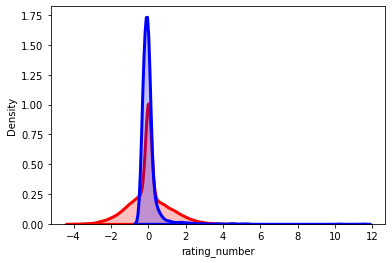

In [447]:
#Actual values vs Predicted values of rating number
ax1=sns.distplot(zmtML_data_GradDesc['rating_number'], hist = False, color="r", kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label="Actual Value")

sns.distplot(y_pred, hist = False, color="b", kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label="Fitted Values", ax=ax1)


### classification

In this session we will be building classification models like Logistic regression, Support Vactor Mahine, Random Forest and KNN models we will compare the models based on the accuracy for better model

In [448]:
zmt_data.corr()

cost  rating_number     votes   groupon
cost           1.000000       0.203112  0.238187  0.055863
rating_number  0.203112       1.000000  0.534069 -0.002264
votes          0.238187       0.534069  1.000000  0.015224
groupon        0.055863      -0.002264  0.015224  1.000000

<AxesSubplot:>

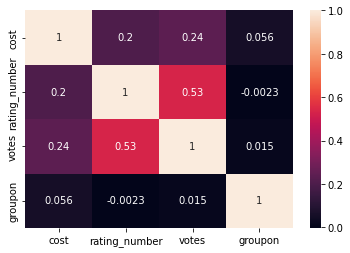

In [449]:
sns.heatmap(zmt_data.corr(), annot = True)

In [450]:
# creating dummies for cuisine variable
df_clf = zmt_data.assign(**pd.get_dummies(zmt_data.cuisine.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


C:\Users\user\AppData\Local\Temp/ipykernel_14536/2946000317.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_clf = zmt_data.assign(**pd.get_dummies(zmt_data.cuisine.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4486: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[k] = com.apply_if_callable(v, data)


In [451]:
# creating dummies for types variable
df_clf = df_clf.assign(**pd.get_dummies(df_clf.types.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


C:\Users\user\AppData\Local\Temp/ipykernel_14536/1453546912.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_clf = df_clf.assign(**pd.get_dummies(df_clf.types.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


In [452]:
#standardising the data
from sklearn.preprocessing import StandardScaler
df_num=df_clf.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(df_clf[df_num])
df_clf[df_num]=scaler.transform(df_clf[df_num])

In [453]:
# one hot encoding is performed
label=LabelEncoder()
df_clf['subzone'] = label.fit_transform(df_clf['subzone'])
#df_clf['rating_text'] = label.fit_transform(df_clf['rating_text'])
df_clf['groupon'] = label.fit_transform(df_clf['groupon'])

In [454]:
df_clf.head(2)

cost                              cuisine  rating_number rating_text  \
0 -0.044960   [Hot Pot, Korean BBQ, BBQ, Korean]       1.903779   Very Good   
1  1.051463  [Cafe, Coffee and Tea, Salad, Poké]       3.498492   Excellent   

   subzone               type      votes  groupon            types  Afghani  \
0       61  ['Casual Dining']   8.460123        0  [Casual Dining]        0   
1      496           ['Café']  21.728836        0           [Café]        0   

   ...  Café  Casual Dining  Club  Dessert Parlour  Fine Dining  Food Court  \
0  ...     0              1     0                0            0           0   
1  ...     1              0     0                0            0           0   

   Food Stall  Food Truck  Pub  Wine Bar  
0           0           0    0         0  
1           0           0    0         0  

[2 rows x 155 columns]

In [455]:
df_clf.drop(['cuisine','type'],axis=1,inplace=True)

In [456]:
df_clf.loc[df_clf['rating_text']=='Poor','target']='1'
df_clf.loc[df_clf['rating_text']=='Average','target']='1'
df_clf.loc[df_clf['rating_text']=='Good','target']='0'
df_clf.loc[df_clf['rating_text']=='Very Good','target']='0'
df_clf.loc[df_clf['rating_text']=='Excellent','target']='0'

In [457]:
df_clf.head(2)

cost  rating_number rating_text  subzone      votes  groupon  \
0 -0.044960       1.903779   Very Good       61   8.460123        0   
1  1.051463       3.498492   Excellent      496  21.728836        0   

             types  Afghani  African  American  ...  Casual Dining  Club  \
0  [Casual Dining]        0        0         0  ...              1     0   
1           [Café]        0        0         0  ...              0     0   

   Dessert Parlour  Fine Dining  Food Court  Food Stall  Food Truck  Pub  \
0                0            0           0           0           0    0   
1                0            0           0           0           0    0   

   Wine Bar  target  
0         0       0  
1         0       0  

[2 rows x 154 columns]

In [458]:
df_clf['target'] = label.fit_transform(df_clf['target'])


In [459]:
df_clf.drop(['rating_text'],axis=1,inplace=True)

In [460]:
X=df_clf
Y=df_clf['target']
X.drop(['target','rating_number'],axis=1,inplace=True)

In [461]:
X.drop(['types'],axis=1,inplace=True)

In [462]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

### Logistic Regression 

In [463]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf_log=LogisticRegression()
clf_log.fit(X_train,y_train)
y_predict=clf_log.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [464]:
print ("Accuracy: \n",metrics.accuracy_score(y_test,y_predict))
print("\n confusion_matrix: \n",metrics.confusion_matrix(y_test,y_predict))
print("\n classification report: \n",metrics.classification_report(y_test,y_predict))

Accuracy: 
 0.8546150167384027

 confusion_matrix: 
 [[ 222  266]
 [  38 1565]]

 classification report: 
               precision    recall  f1-score   support

           0       0.85      0.45      0.59       488
           1       0.85      0.98      0.91      1603

    accuracy                           0.85      2091
   macro avg       0.85      0.72      0.75      2091
weighted avg       0.85      0.85      0.84      2091



### Random Forest

In [465]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)  # randome forest model is fit

RandomForestClassifier()

In [466]:
pred_rf = clf_rf.predict(X_test) # prediction is done

In [467]:
cnf_matrix = metrics.confusion_matrix(y_test, pred_rf )
print(cnf_matrix)

[[ 325  163]
 [  70 1533]]


In [468]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       488
           1       0.90      0.96      0.93      1603

    accuracy                           0.89      2091
   macro avg       0.86      0.81      0.83      2091
weighted avg       0.88      0.89      0.88      2091



In [469]:
print("Accuracy:", metrics.accuracy_score(y_test, pred_rf))
print("Precision:", metrics.precision_score(y_test, pred_rf, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, pred_rf, average = 'weighted'))
print("F1-Score:", metrics.f1_score(y_test, pred_rf, average = 'weighted'))

Accuracy: 0.8885700621712099
Precision: 0.8849627340814986
Recall: 0.8885700621712099
F1-Score: 0.8842726327585297


### Support Vector Machine

In [470]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [471]:
model = SVC( )

In [472]:
model.fit(X_train, y_train) # model is fitted

SVC()

In [473]:
predicted = model.predict(X_test) # model prediction

In [474]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[   0  488]
 [   0 1603]]


In [475]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       488
           1       0.77      1.00      0.87      1603

    accuracy                           0.77      2091
   macro avg       0.38      0.50      0.43      2091
weighted avg       0.59      0.77      0.67      2091



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [476]:
print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Precision:", metrics.precision_score(y_test, predicted, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, predicted, average = 'weighted'))
print("F1-Score:", metrics.f1_score(y_test, predicted, average = 'weighted'))

Accuracy: 0.7666188426590148
Precision: 0.5877044499198473
Recall: 0.7666188426590148
F1-Score: 0.6653438033472662


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-Means Clustering

In [477]:
from sklearn.neighbors import KNeighborsClassifier

In [478]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)  # model is fitted using KNN classifier

KNeighborsClassifier()

In [479]:
predicted = clf_knn.predict(X_test)  # model prediction is done
cnf_matrix = metrics.confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[ 152  336]
 [ 103 1500]]


In [480]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.31      0.41       488
           1       0.82      0.94      0.87      1603

    accuracy                           0.79      2091
   macro avg       0.71      0.62      0.64      2091
weighted avg       0.77      0.79      0.76      2091



In [481]:
print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Precision:", metrics.precision_score(y_test, predicted, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, predicted, average = 'weighted'))
print("F1-Score:", metrics.f1_score(y_test, predicted, average = 'weighted'))

Accuracy: 0.790052606408417
Precision: 0.7654360580514685
Recall: 0.790052606408417
F1-Score: 0.764245737777078
